# Diagramas de Prescripción y Dispensación
Este notebook genera diagramas simples en Python usando **matplotlib**.

In [1]:

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

def draw_box(ax, xy, text, size=(2.6,1.0), fontsize=10):
    x, y = xy
    w, h = size
    box = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.02,rounding_size=0.06")
    ax.add_patch(box)
    ax.text(x + w/2, y + h/2, text, ha="center", va="center", fontsize=fontsize)
    return (x + w/2, y + h/2), (x, y, w, h)

def draw_arrow(ax, src, dst, text=None, text_offset=(0,0), connectionstyle="arc3,rad=0.0", fontsize=9):
    a = FancyArrowPatch(src, dst, arrowstyle="-|>", mutation_scale=12, connectionstyle=connectionstyle)
    ax.add_patch(a)
    if text:
        tx = (src[0] + dst[0]) / 2 + text_offset[0]
        ty = (src[1] + dst[1]) / 2 + text_offset[1]
        ax.text(tx, ty, text, ha="center", va="center", fontsize=fontsize)


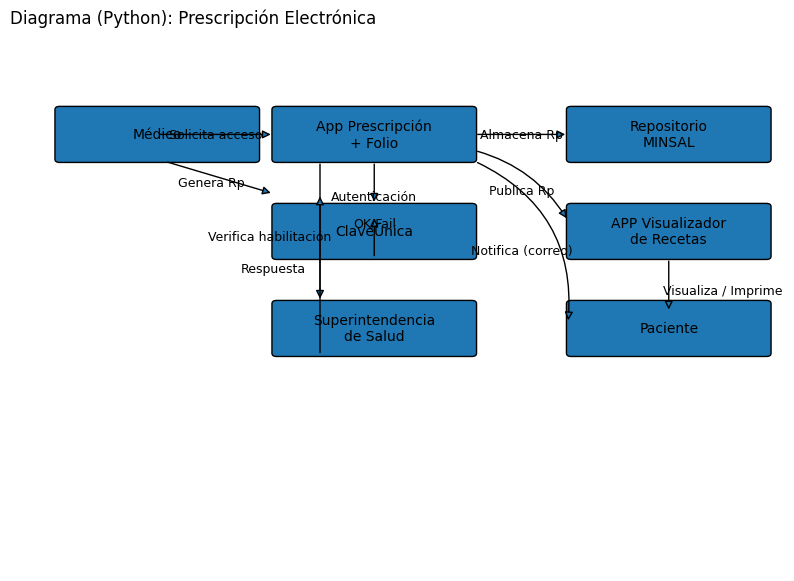

In [2]:

# --------- Diagrama 1: Prescripción ---------
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis("off")

# Colocar nodos
medico_c, medico_bb = draw_box(ax, (0.6, 7.6), "Médico")
app_c, app_bb = draw_box(ax, (3.4, 7.6), "App Prescripción\n+ Folio")
clave_c, _ = draw_box(ax, (3.4, 5.8), "ClaveÚnica")
sup_c, _ = draw_box(ax, (3.4, 4.0), "Superintendencia\nde Salud")
repo_c, _ = draw_box(ax, (7.2, 7.6), "Repositorio\nMINSAL")
viewer_c, _ = draw_box(ax, (7.2, 5.8), "APP Visualizador\nde Recetas")
paciente_c, _ = draw_box(ax, (7.2, 4.0), "Paciente")

# Flechas principales
draw_arrow(ax, (1.9, 8.1), (3.4, 8.1), "Solicita acceso")
draw_arrow(ax, (4.7, 7.6), (4.7, 6.8), "Autenticación", text_offset=(0.0,-0.25))
draw_arrow(ax, (4.7, 5.8), (4.7, 6.6), "OK/Fail", text_offset=(0.0,0.25))
draw_arrow(ax, (4.0, 7.6), (4.0, 5.0), "Verifica habilitación", text_offset=(-0.65,-0.1))
draw_arrow(ax, (4.0, 4.0), (4.0, 7.0), "Respuesta", text_offset=(-0.6,0.1))
draw_arrow(ax, (2.0, 7.6), (3.4, 7.0), "Genera Rp", text_offset=(-0.1,-0.1))
draw_arrow(ax, (6.0, 8.1), (7.2, 8.1), "Almacena Rp")
draw_arrow(ax, (6.0, 7.8), (7.2, 6.5), "Publica Rp", text_offset=(0.0,-0.1), connectionstyle="arc3,rad=-0.2")
draw_arrow(ax, (6.0, 7.6), (7.2, 4.6), "Notifica (correo)", text_offset=(0.0,-0.15), connectionstyle="arc3,rad=-0.35")
draw_arrow(ax, (8.5, 5.8), (8.5, 4.8), "Visualiza / Imprime", text_offset=(0.7,-0.1))

ax.set_title("Diagrama (Python): Prescripción Electrónica", loc="left")
plt.show()


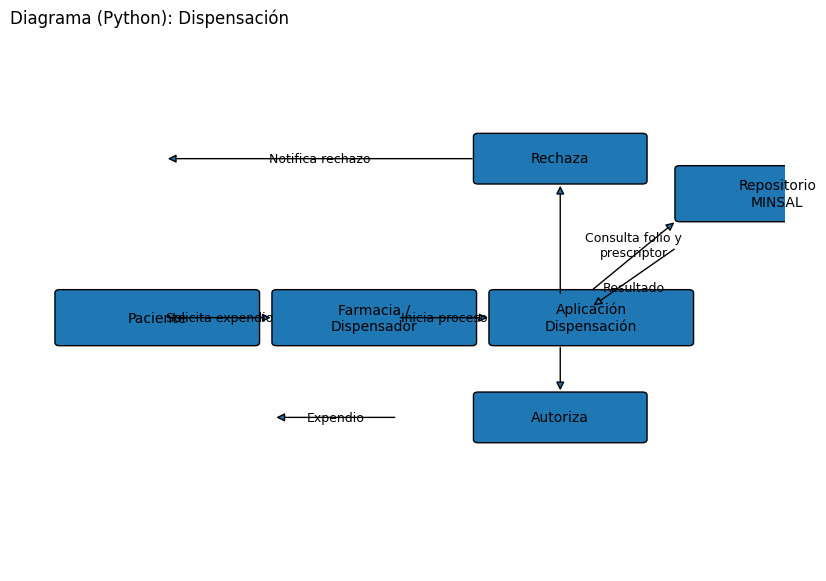

In [3]:

# --------- Diagrama 2: Dispensación ---------
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis("off")

pac2_c, _ = draw_box(ax, (0.6, 4.2), "Paciente")
farm_c, _ = draw_box(ax, (3.4, 4.2), "Farmacia /\nDispensador")
appd_c, _ = draw_box(ax, (6.2, 4.2), "Aplicación\nDispensación")
repo2_c, _ = draw_box(ax, (8.6, 6.5), "Repositorio\nMINSAL")

# Flujo
draw_arrow(ax, (2.0, 4.7), (3.4, 4.7), "Solicita expendio")
draw_arrow(ax, (5.0, 4.7), (6.2, 4.7), "Inicia proceso")
draw_arrow(ax, (7.5, 5.2), (8.6, 6.5), "Consulta folio y\nprescriptor", text_offset=(0.0,0.2))
draw_arrow(ax, (8.6, 6.0), (7.5, 4.9), "Resultado", text_offset=(0.0,-0.2))

# Alternativas
# Autoriza
auth_c, _ = draw_box(ax, (6.0, 2.4), "Autoriza", size=(2.2,0.9))
draw_arrow(ax, (7.1, 4.2), (7.1, 3.3))
draw_arrow(ax, (5.0, 2.85), (3.4, 2.85), "Expendio")
# Rechaza
rej_c, _ = draw_box(ax, (6.0, 7.2), "Rechaza", size=(2.2,0.9))
draw_arrow(ax, (7.1, 5.1), (7.1, 7.2))
draw_arrow(ax, (6.0, 7.65), (2.0, 7.65), "Notifica rechazo")

ax.set_title("Diagrama (Python): Dispensación", loc="left")
plt.show()
